# Bioinformatics 1, Lecture 6
# MSA and phylogenetics


# Part 1: MSA

In [1]:
%pylab inline

# import required Biophython functions 
from Bio import Entrez
from Bio.Blast import NCBIXML
from Bio.Blast import NCBIWWW
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
from Bio.Align import AlignInfo
from Bio import SubsMat


Populating the interactive namespace from numpy and matplotlib


### first obtain the sequence identifier for your chosen gene from the NCBI database
Note here we work with protein sequences, so make sure you get the protein entry:
go to 'Reference Sequence' and choose the entry beginning with NP_

In [2]:
Entrez.email = 'A.N.Other@example.com'

# example is based on the blue cone opsin, human
my_protein = 'NP_001699.1' 

handle = Entrez.efetch(db="protein", id=my_protein, rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

In [3]:
# show the sequence record
# here we have choosen the human Thy1 gene
print(record)

ID: NP_001699.1
Name: NP_001699
Description: short-wave-sensitive opsin 1 [Homo sapiens]
Number of features: 13
/topology=linear
/data_file_division=PRI
/date=02-OCT-2017
/accessions=['NP_001699']
/sequence_version=1
/db_source=REFSEQ: accession NM_001708.2
/keywords=['RefSeq']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Myopia and Late-Onset Progressive Cone Dystrophy Associate to LVAVA/MVAVA Exon 3 Interchange Haplotypes of Opsin Genes on Chromosome X', ...), Reference(title='A G Protein-Coupled Receptor Dimerization Interface in Human Cone Opsins', ...), Reference(title='Congenital Achromatopsia and Macular Atrophy Caused by a Novel Recessive PDE6C Mutation (p.E591K)', ...), Reference(title='Genome-wide association study of primary tooth eruption identif

## run a BLAST via the web

In [4]:
result_handle = NCBIWWW.qblast('blastp', 'swissprot', record.seq)
# This may take some time to run

In [5]:
# parse the results
result_handle.seek(0)
blast_record = NCBIXML.read(result_handle)

## print some information on the BLAST hits

To see the data structure for the results, go here:
[http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc94]    

In [6]:
print('Gene name\te-value\tscore')
for a in blast_record.alignments:
    print(a.title.split('|')[4].split(' ')[0]+'\t'+str(a.hsps[0].expect)+'\t'+str( a.hsps[0].score))


Gene name	e-value	score
OPSB_HUMAN	0.0	1849.0
OPSB_SAIBB	0.0	1707.0
OPSB_RAT	0.0	1618.0
OPSB_MOUSE	0.0	1615.0
OPSB_BOVIN	0.0	1614.0
OPSUV_MELUD	0.0	1498.0
OPSV_CHICK	0.0	1480.0
OPSV_XENLA	0.0	1383.0
OPSV_ORYLA	1.03422e-154	1132.0
OP1S1_DANRE	3.94759e-154	1128.0
OPSUV_CARAU	6.15224e-148	1087.0
OPSB_CARAU	2.01034e-119	901.0
OPSB_ORYLA	6.33626e-111	845.0
OPSG3_DANRE	6.90741e-111	844.0
OPSG4_DANRE	7.29393e-111	844.0
OPSD_SMICR	1.56273e-110	842.0
OPSP_COLLI	2.45672e-109	834.0
OPSB_ASTFA	3.26311e-109	834.0
OPSB_CHICK	3.26353e-109	834.0
OPSD_RANTE	3.40803e-109	833.0
OPSG2_DANRE	2.19109e-108	828.0
OP1S2_DANRE	2.41762e-108	828.0
OPSB_GECGE	3.10536e-108	827.0
OPSG1_DANRE	5.58746e-108	825.0
OPSD_LITCT	6.6522e-108	825.0
OPSD_ANOCA	1.25052e-107	823.0
OPSD_AMBTI	2.45537e-107	821.0
OPSD_LITPI	5.37505e-107	819.0
OPSD_GALML	8.48912e-107	818.0
OPSD_SCYCA	1.52771e-106	816.0
OPSD_RAT	2.84127e-106	814.0
OPSG_CHICK	4.38869e-106	813.0
OPSB_CONCO	5.82635e-106	812.0
OPSG1_CARAU	6.56745e-106	811.0
OPSD_MACFA	2.

In [8]:
# read the full ncbi entries
a=blast_record.alignments[0]
sp_ids = []
for a in blast_record.alignments:
    sp_ids.append(a.title.split('|')[3])
# print(",".join(sp_ids))
handle = Entrez.efetch(db="protein", id=",".join(sp_ids), retmode="xml")#, rettype='gb')
data = Entrez.read(handle)
species = []
print('Alignment score\tSpecies')
for i,d in enumerate(data):
    species.append(d['GBSeq_source'])
    print(str(blast_record.alignments[i].hsps[0].score)+'\t'+d['GBSeq_source'])

Alignment score	Species
1849.0	Homo sapiens (human)
1707.0	Saimiri boliviensis boliviensis (Bolivian squirrel monkey)
1618.0	Rattus norvegicus (Norway rat)
1615.0	Mus musculus (house mouse)
1614.0	Bos taurus (cattle)
1498.0	Melopsittacus undulatus (budgerigar)
1480.0	Gallus gallus (chicken)
1383.0	Xenopus laevis (African clawed frog)
1132.0	Oryzias latipes (Japanese medaka)
1128.0	Danio rerio (zebrafish)
1087.0	Carassius auratus (goldfish)
901.0	Carassius auratus (goldfish)
845.0	Oryzias latipes (Japanese medaka)
844.0	Danio rerio (zebrafish)
844.0	Danio rerio (zebrafish)
842.0	Sminthopsis crassicaudata (fat-tailed dunnart)
834.0	Columba livia (rock pigeon)
834.0	Astyanax fasciatus (banded astyanax)
834.0	Gallus gallus (chicken)
833.0	Rana temporaria (common frog)
828.0	Danio rerio (zebrafish)
828.0	Danio rerio (zebrafish)
827.0	Gekko gecko (tokay)
825.0	Danio rerio (zebrafish)
825.0	Rana catesbeiana (American bullfrog)
823.0	Anolis carolinensis (green anole)
821.0	Ambystoma tigrinum (

In [9]:
# data now contains the full information about every gene:
data[1]

{'GBSeq_locus': 'OPSB_SAIBB', 'GBSeq_length': '349', 'GBSeq_moltype': 'AA', 'GBSeq_topology': 'linear', 'GBSeq_division': 'PRI', 'GBSeq_update-date': '10-MAY-2017', 'GBSeq_create-date': '15-JUL-1998', 'GBSeq_definition': 'RecName: Full=Short-wave-sensitive opsin 1; AltName: Full=Blue cone photoreceptor pigment; AltName: Full=Blue-sensitive opsin; Short=BOP', 'GBSeq_primary-accession': 'O13092', 'GBSeq_accession-version': 'O13092.1', 'GBSeq_other-seqids': ['sp|O13092.1|OPSB_SAIBB', 'gi|3024251'], 'GBSeq_keywords': ['Chromophore', 'Disulfide bond', 'G-protein coupled receptor', 'Glycoprotein', 'Membrane', 'Phosphoprotein', 'Photoreceptor protein', 'Receptor', 'Retinal protein', 'Sensory transduction', 'Transducer', 'Transmembrane', 'Transmembrane helix', 'Vision'], 'GBSeq_source': 'Saimiri boliviensis boliviensis (Bolivian squirrel monkey)', 'GBSeq_organism': 'Saimiri boliviensis boliviensis', 'GBSeq_taxonomy': 'Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi; Mammalia; 

In [10]:
# print all results with e-value below this value:
E_VALUE_THRESH = 1e-6
# lower this threshold to also see sequences with poor match, if there are any

# now print, for each match:

# name of alignment
# length of alignment
# e-value
# Query sequence
# Matching sequence
# Alignment info

for i,alignment in enumerate(blast_record.alignments):
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print('****Alignment****')
            print('sequence: ', alignment.title)
            print('species: '+species[i])
            print('length: ', alignment.length)
            print('e value: ', hsp.expect)
            print(hsp.query[0:75] + '...')
            print(hsp.sbjct[0:75] + '...')
            print(hsp.match[0:75] + '...')


****Alignment****
sequence:  gi|129203|sp|P03999.1|OPSB_HUMAN RecName: Full=Short-wave-sensitive opsin 1; AltName: Full=Blue cone photoreceptor pigment; AltName: Full=Blue-sensitive opsin; Short=BOP >gi|38502866|sp|P60015.1|OPSB_PANTR RecName: Full=Short-wave-sensitive opsin 1; AltName: Full=Blue cone photoreceptor pigment; AltName: Full=Blue-sensitive opsin; Short=BOP >gi|45477021|sp|P60573.1|OPSB_PANPA RecName: Full=Short-wave-sensitive opsin 1; AltName: Full=Blue cone photoreceptor pigment; AltName: Full=Blue-sensitive opsin; Short=BOP
species: Homo sapiens (human)
length:  348
e value:  0.0
MRKMSEEEFYLFKNISSVGPWDGPQYHIAPVWAFYLQAAFMGTVFLIGFPLNAMVLVATLRYKKLRQPLNYILVN...
MRKMSEEEFYLFKNISSVGPWDGPQYHIAPVWAFYLQAAFMGTVFLIGFPLNAMVLVATLRYKKLRQPLNYILVN...
MRKMSEEEFYLFKNISSVGPWDGPQYHIAPVWAFYLQAAFMGTVFLIGFPLNAMVLVATLRYKKLRQPLNYILVN...
****Alignment****
sequence:  gi|3024251|sp|O13092.1|OPSB_SAIBB RecName: Full=Short-wave-sensitive opsin 1; AltName: Full=Blue cone photoreceptor pigment; AltName

## prepare data for MSA and run MUSCLE

In [11]:
# now work with all results with e-value below this value:
E_VALUE_THRESH = 1e-6

# the following will write all results into a FASTA file for the MSA 

def get_seqrecs(alignments, threshold):
    # a little helper function to get the sequence records
    for i,aln in enumerate(alignments):
        for hsp in aln.hsps:
            if hsp.expect < threshold:
#                 id = species[i].replace(' ','_')[:9]#aln.title.split('|')[4].split(' ')[0]
                id = aln.title.split('|')[4].split(' ')[0].split('_')[0]+'_'+species[i].replace(' ','_')[:9]#aln.title.split('|')[4].split(' ')[0]
#                 id = aln.title.split('|')[4].split(' ')[0]
#                 id = aln.accession
                print(id)
                yield SeqRecord(Seq(hsp.sbjct), id=id)#,description=str(aln.title.split('|')[4]))
                break
 
best_seqs = get_seqrecs(blast_record.alignments, E_VALUE_THRESH)
# write out to a fasta file
SeqIO.write(best_seqs, 'family_alignment.fasta', 'fasta')

OPSB_Homo_sapi
OPSB_Saimiri_b
OPSB_Rattus_no
OPSB_Mus_muscu
OPSB_Bos_tauru
OPSUV_Melopsitt
OPSV_Gallus_ga
OPSV_Xenopus_l
OPSV_Oryzias_l
OP1S1_Danio_rer
OPSUV_Carassius
OPSB_Carassius
OPSB_Oryzias_l
OPSG3_Danio_rer
OPSG4_Danio_rer
OPSD_Sminthops
OPSP_Columba_l
OPSB_Astyanax_
OPSB_Gallus_ga
OPSD_Rana_temp
OPSG2_Danio_rer
OP1S2_Danio_rer
OPSB_Gekko_gec
OPSG1_Danio_rer
OPSD_Rana_cate
OPSD_Anolis_ca
OPSD_Ambystoma
OPSD_Rana_pipi
OPSD_Galeus_me
OPSD_Scyliorhi
OPSD_Rattus_no
OPSG_Gallus_ga
OPSB_Conger_co
OPSG1_Carassius
OPSD_Macaca_fa
OPSD_Alligator
OPSD_Oryctolag
OPSD_Phoca_gro
OPSD_Phoca_vit
OPSD_Loxodonta
OPSD_Bos_tauru
OPSD_Otolemur_
OPSD_Mus_muscu
OPSD_Gallus_ga
OPSD_Felis_cat
OPSD_Delphinus
OPSG2_Carassius
OPSD_Caluromys
OPSD_Cricetulu
OPSB_Anolis_ca


50

In [12]:
# run Muscle MSA
cmdline = MuscleCommandline('./muscle3.8.31_i86linux64',input='family_alignment.fasta', 
                            out='family_alignment.aln', clw=True)
cmdline()

('',
 '\nMUSCLE v3.8.31 by Robert C. Edgar\n\nhttp://www.drive5.com/muscle\nThis software is donated to the public domain.\nPlease cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.\n\nfamily_alignment 50 seqs, max length 353, avg  length 337\n00:00:00    10 MB(-2%)  Iter   1    0.08%  K-mer dist pass 1\n00:00:00    10 MB(-2%)  Iter   1   39.29%  K-mer dist pass 1\n00:00:00    10 MB(-2%)  Iter   1   78.51%  K-mer dist pass 1\n00:00:00    10 MB(-2%)  Iter   1  100.00%  K-mer dist pass 1\n00:00:00    10 MB(-2%)  Iter   1    0.08%  K-mer dist pass 2\n00:00:00    10 MB(-2%)  Iter   1   39.29%  K-mer dist pass 2\n00:00:00    10 MB(-2%)  Iter   1   78.51%  K-mer dist pass 2\n00:00:00    10 MB(-2%)  Iter   1  100.00%  K-mer dist pass 2\n00:00:00    11 MB(-2%)  Iter   1    2.04%  Align node       \n00:00:00    13 MB(-2%)  Iter   1    4.08%  Align node\n00:00:00    13 MB(-2%)  Iter   1    6.12%  Align node\n00:00:00    13 MB(-2%)  Iter   1    8.16%  Align node\n00:00:00    13 MB(-2%)  Iter   1

In [13]:

alignment = AlignIO.read('family_alignment.aln','clustal')
print(alignment)


SingleLetterAlphabet() alignment with 50 rows and 360 columns
--------------------HTSTPGPFDGPQWPHQAPRGMYLS...--- OPSP_Columba_l
-----LEEEDFYLF-----KNVSNVSPFDGPQY-HIAPKWAFTL...--- OPSV_Xenopus_l
--MRKMSEEEFYLF-----KNISSVGPWDGPQY-HIAPVWAFYL...GPN OPSB_Homo_sapi
-MSKMPEEEEFYLF-----KNISSVGPWDGPQY-HIAPVWAFQL...GPN OPSB_Saimiri_b
-MSKMSEEEEFLLF-----KNISLVGPWDGPQY-HLAPVWAFHL...GPN OPSB_Bos_tauru
-------EDEFYLF-----QNISSVGPWDGPQY-HIAPVWAFHL...GPH OPSB_Rattus_no
-------EDDFYLF-----QNISSVGPWDGPQY-HLAPVWAFRL...GPH OPSB_Mus_muscu
-------EEEFYLF-----KNGSIGGPWDGPQY-HIAPPWAFYL...--- OPSUV_Melopsitt
------SDDDFYLF-----TNGSVPGPWDGPQY-HIAPPWAFYL...GPT OPSV_Gallus_ga
----------FYLY-----ENISKVGPYDGPQY-YLAPTWAFYL...--- OPSV_Oryzias_l
-------------F-----GNASKVSPFEGEQY-HIAPKWAFYL...--- OP1S1_Danio_rer
-----------YQF-----GNLSKISPFEGPQY-HLAPKWAFYL...--- OPSUV_Carassius
--------------------------PFEYPQY-YLAEPWAFSI...--- OPSB_Conger_co
----MNGTEGENFYVPMSNKTGVVRNPFEYPQY-YLADHWMFAV...SP- OPSD_Galeus_me
----MNGTEGE

In [14]:
summary_align = AlignInfo.SummaryInfo(alignment)

# compute a consensus sequence by taking the most frequent letter
# positions below a thresold similarity are shown as 'X'

# the threshold can be adjusted by adding e.g. threshold=0.5

print('Consensus sequence without gaps:')
print(summary_align.dumb_consensus())
print('Consensus sequence with gaps:')
print(summary_align.gap_consensus())
print('Consensus sequence with gaps and different threshold:')
print(summary_align.gap_consensus(threshold=0.05))

Consensus sequence without gaps:
MXXXMNGXEXXXXXVPXSNXXXXXXSPFXXPQYPXLAXPWXFXXXAAXMFXLXXXGXPXNXLTLXVTXXXKKLRXPLNYILXNLAXAXXXXXXXGXXXXXXXSXXGYFVFGXXGCXXEGFXATLGGXXXLWSLXVLAXERYXVXCKPXXNFRFXXXHAXXGXXXTWXMAXXCAXPPLXGWSRYIPEGXQCSCGXDXYTXXXXXNNESXVXXXFXXXFXXPXXXIXFXYGXLXXTXKXAAAQQQESAXTQKAEXEVTRMVXXMVXXFLXCWXPYAXXAXXIXXXXGXXFXXXXXTXPAFFXKXSXXYNPXIYXXMNKQFRXCMXXTXCCGKNPXXDXXVXXXXXXSKTEXSXVXXSQVXPX
Consensus sequence with gaps:
----XXXXXXXXXXXXXXXXXXXXXXPFXXPQY-XLAXPWXFXXXAAXMFXLXXXGXPXNXLTLXVTXXXKKLRXPLNYILXNLAXAXXXXXXXGXXXXXXXSXXGYFVFGXXGCXXEGFXATLGGXXXLWSLXVLAXERYXVXCKPXXNFRFXXXHAXXGXXXTWXMAXXCAXPPLXGWSRYIPEGXQCSCGXDXYTXXXXXNNESXVXXXFXXXFXXPXXXIXFXYGXLXXTXKXAAAQQQESAXTQKAEXEVTRMVXXMVXXFLXCWXPYAXXAXXIXXXXGXXFXXXXXTXPAFFXKXSXXYNPXIYXXMNKQFRXCMXXTXXCGKXPXXDXX-XXXXXXXKTEXSXVXXXX----
Consensus sequence with gaps and different threshold:
--------EX-NFY-----KTGVVRSPFEYPQY-YLAEPWQFSLLAAYMFFLIVLGFPINFLTLYVTXQHKKLRTPLNYILVNLAVADLFMVFXGFTTTFYTSLHGYFVFGPTGCALEGFFATLGGEVALWSLVVLAIERYVVVCKPMGNFRFGENHAIMG

In [15]:
# print a Position Specific Score Matrix (PSSM)
# this shows the number of letters counted at each location
# in the sequence, which is shown in vertical along the left
pssm = summary_align.pos_specific_score_matrix(summary_align.dumb_consensus(), chars_to_ignore = ['X'])
print(pssm)

    -   A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y
M  49.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  47.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  46.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0
X  46.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0
M  27.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 21.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
N  26.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 19.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
G  25.0 0.0 0.0 0.0 3.0 1.0 19.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0
X  21.0 0.0 0.0 1.0 7.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 19.0 0.0 0.0 0.0
E  19.0 0.0 0.0 3.0 28.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  19.0 0.0 0.0 7.0 5.0 0.0 19.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  18.0 0.0 0.0 0.0 2.0 13.0

In [16]:
# How to construct a substitution matrix from the alignment
summary_align = AlignInfo.SummaryInfo(alignment)
# done here only for charged amino acids
replace_info = summary_align.replacement_dictionary(["G", "A", "V", "L", "I", "M", "P", "F",
                                                     "W", "S", "T", "N", "Q", "Y", "C"])
my_arm = SubsMat.SeqMat(replace_info)
my_lom = SubsMat.make_log_odds_matrix(my_arm)
my_lom.print_mat()

# you notice that in this example many entries are not defined
# this is because the alignment is too short and does not have all combinations

# you can use a different gene, and/or reduce the e-value threshold to include more data

-   1
D  -2   3
E  -2   0   1
H  -3  -5  -4   4
K  -3  -4  -3  -3   2
R  -3  -6  -6  -1   0   2
   -   D   E   H   K   R


# Part 2: Phylogenetic trees

In [17]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
#from TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)
print(dm)

OPSP_Columba_l	0
OPSV_Xenopus_l	0.49722222222222223	0
OPSB_Homo_sapi	0.55	0.2777777777777778	0
OPSB_Saimiri_b	0.5638888888888889	0.275	0.0888888888888889	0
OPSB_Bos_tauru	0.5805555555555555	0.28888888888888886	0.14722222222222225	0.13888888888888884	0
OPSB_Rattus_no	0.5555555555555556	0.28055555555555556	0.13611111111111107	0.1444444444444445	0.14166666666666672	0
OPSB_Mus_muscu	0.5555555555555556	0.27222222222222225	0.14722222222222225	0.1527777777777778	0.13888888888888884	0.04166666666666663	0
OPSUV_Melopsitt	0.5055555555555555	0.22777777777777775	0.2055555555555556	0.21111111111111114	0.2138888888888889	0.2055555555555556	0.20277777777777772	0
OPSV_Gallus_ga	0.5444444444444445	0.2777777777777778	0.19999999999999996	0.2055555555555556	0.20833333333333337	0.20277777777777772	0.19444444444444442	0.18055555555555558	0
OPSV_Oryzias_l	0.5527777777777778	0.37222222222222223	0.38055555555555554	0.38888888888888884	0.37222222222222223	0.3583333333333333	0.3472222222222222	0.3583333333333333

In [18]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
#from TreeConstruction import DistanceTreeConstructor
# here supply the keyword upgma or nj
# compare the trees you get from both methods
constructor = DistanceTreeConstructor(calculator, 'upgma')
tree = constructor.build_tree(alignment)
print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner49')
        Clade(branch_length=0.08610178720619943, name='Inner47')
            Clade(branch_length=0.06577157576878867, name='Inner45')
                Clade(branch_length=0.0189236111111111, name='Inner43')
                    Clade(branch_length=0.03923611111111111, name='Inner41')
                        Clade(branch_length=0.12430555555555556, name='OPSB_Carassius')
                        Clade(branch_length=0.01597222222222222, name='Inner37')
                            Clade(branch_length=0.10833333333333334, name='OP1S2_Danio_rer')
                            Clade(branch_length=0.10833333333333334, name='OPSB_Astyanax_')
                    Clade(branch_length=0.16354166666666667, name='OPSB_Oryzias_l')
                Clade(branch_length=0.18246527777777777, name='OPSB_Gallus_ga')
            Clade(branch_length=0.1461535202132331, name='Inner44')
                Clade(branch_length=0.07137440045674642, name='Inner39

                            _______________ OPSB_Carassius
                       ____|
                      |    |   ____________ OP1S2_Danio_rer
                     _|    |__|
                    | |       |____________ OPSB_Astyanax_
             _______| |
            |       | |____________________ OPSB_Oryzias_l
            |       |
            |       |______________________ OPSB_Gallus_ga
            |
            |                                       ___ OPSB_Anolis_ca
            |                               _______|
            |                            __|       |___ OPSG_Gallus_ga
            |                           |  |
            |                           |  |___________ OPSB_Gekko_gec
            |                           |
            |                  _________|             _____ OPSG3_Danio_rer
            |                 |         |            |
            |                 |         |         ___|  __ OPSG4_Danio_rer
            |           

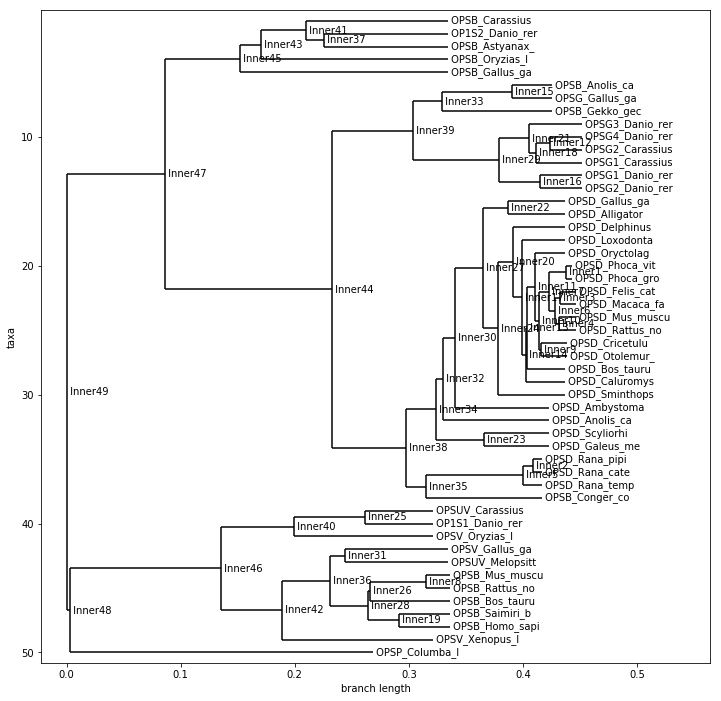

In [19]:
from Bio import Phylo
# now draw the tree, try out these three methods:
Phylo.draw_ascii(tree)
plt.figure(figsize=(12,12))
ax=plt.subplot(111)
Phylo.draw(tree,axes=ax)
# to use this, you need to have the package networkx installed:
#Phylo.draw_graphviz(tree)
